First we need to install miniconda in the colab environment to be able to run python backend for tensorflow. This and the following cell will take about one to two minutes each to run and needs to be done everytime you connect to colab.

In [1]:
install.packages('reticulate')
reticulate::install_miniconda()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RcppTOML’, ‘here’, ‘png’


* Installing Miniconda -- please wait a moment ...

* Downloading 'https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh' ...

+ /usr/bin/bash /tmp/RtmplAOAgA/Miniconda3-latest-Linux-x86_64.sh -b -u -p '/root/.local/share/r-miniconda'

+ /root/.local/share/r-miniconda/bin/conda update --yes --name base conda

+ /root/.local/share/r-miniconda/bin/conda create --yes --name r-reticulate 'python=3.10' numpy --quiet -c conda-forge

* Miniconda has been successfully installed at "~/.local/share/r-miniconda".



[1] "/root/.local/share/r-miniconda"

Then we can install the r-packages we need (modify as necessary)

In [2]:
install.packages('tensorflow')
install.packages('keras')
install.packages("remotes")
remotes::install_github("MansMeg/IntroML",
subdir = "rpackage")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘config’, ‘tfruns’, ‘tfautograph’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zeallot’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




checkmate (NA -> 2.3.2) [CRAN]


Installing 1 packages: checkmate

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmplAOAgA/remotes10e2b0b5132/MansMeg-IntroML-a2d2824/rpackage/DESCRIPTION’ ... OK
* preparing ‘uuml’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘uuml_0.4.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Once the tensorflow and keras r-packages are installed we can run the `install_keras()` command to install tensorflow.

In [3]:
library('keras')
install_keras(method = "conda", python_version = "3.9")

+ /root/.local/share/r-miniconda/bin/conda create --yes --name r-tensorflow 'python=3.9' --quiet -c conda-forge

+ /root/.local/share/r-miniconda/bin/conda install --yes --name r-tensorflow 'python=3.9' -c conda-forge




Installation complete.



Due to some issues with the dataset caching for the mnist dataset we need to manually download it separately.

In [4]:
url <- "https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz"
destfile <- "/root/.keras/datasets/mnist.npz"
dir.create(dirname(destfile), recursive = TRUE, showWarnings = FALSE)
download.file(url, destfile, mode = "wb")

Finally we can run some r-code to make sure everything works

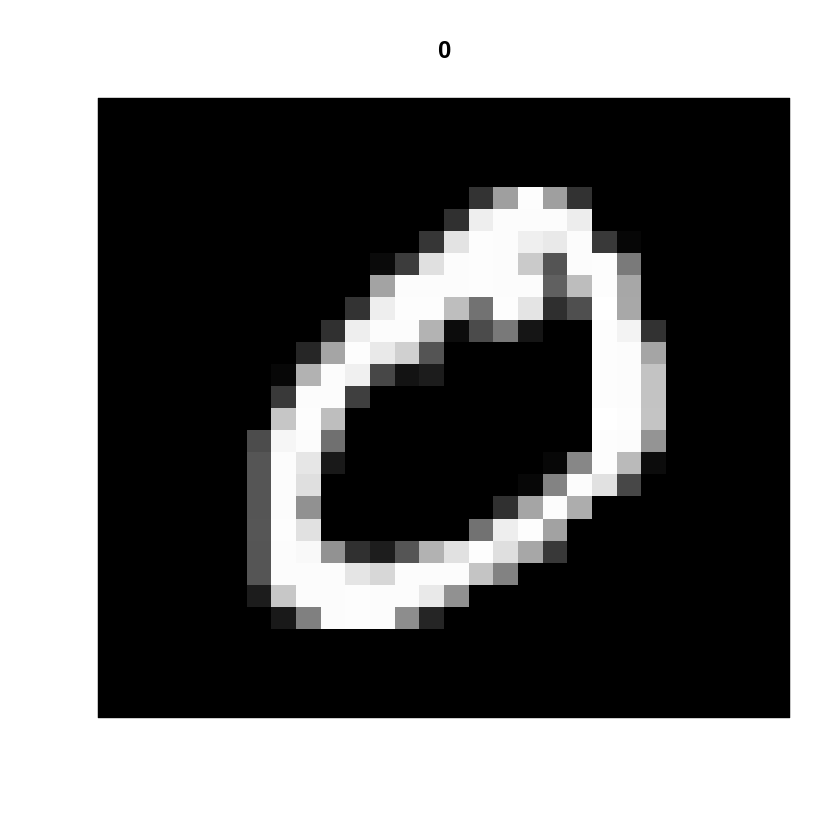

In [5]:
library(keras)
mnist <- dataset_mnist(path = 'mnist.npz')

idx <- 2
im <- mnist$train$x[idx,,]
# Transpose the image
im <- t(apply(im, 2, rev))
image(1:28, 1:28, im, col=gray((0:255)/255), xlab = "", ylab = "",
xaxt='n', yaxt='n', main=paste(mnist$train$y[idx]))

And run the example from https://tensorflow.rstudio.com/tutorials/beginners/ to make sure model training works

Note! Currently this notebook won't output anything during training so we have to `plot(history)`

In [6]:
mnist$train$x <- mnist$train$x/255
mnist$test$x <- mnist$test$x/255

model <- keras_model_sequential() %>%
  layer_flatten(input_shape = c(28, 28)) %>%
  layer_dense(units = 16, activation = "sigmoid") %>%
  layer_dense(10, activation = "softmax")

  summary(model)

  model %>%
  compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = "sgd",
    metrics = "accuracy"
  )

  history <- model %>%
  fit(
    x = mnist$train$x, y = mnist$train$y,
    epochs = 5,
    validation_split = 0.3,
    verbose = 2
  )

Model: "sequential"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 flatten (Flatten)                  (None, 784)                     0           
 dense_1 (Dense)                    (None, 16)                      12560       
 dense (Dense)                      (None, 10)                      170         
Total params: 12730 (49.73 KB)
Trainable params: 12730 (49.73 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


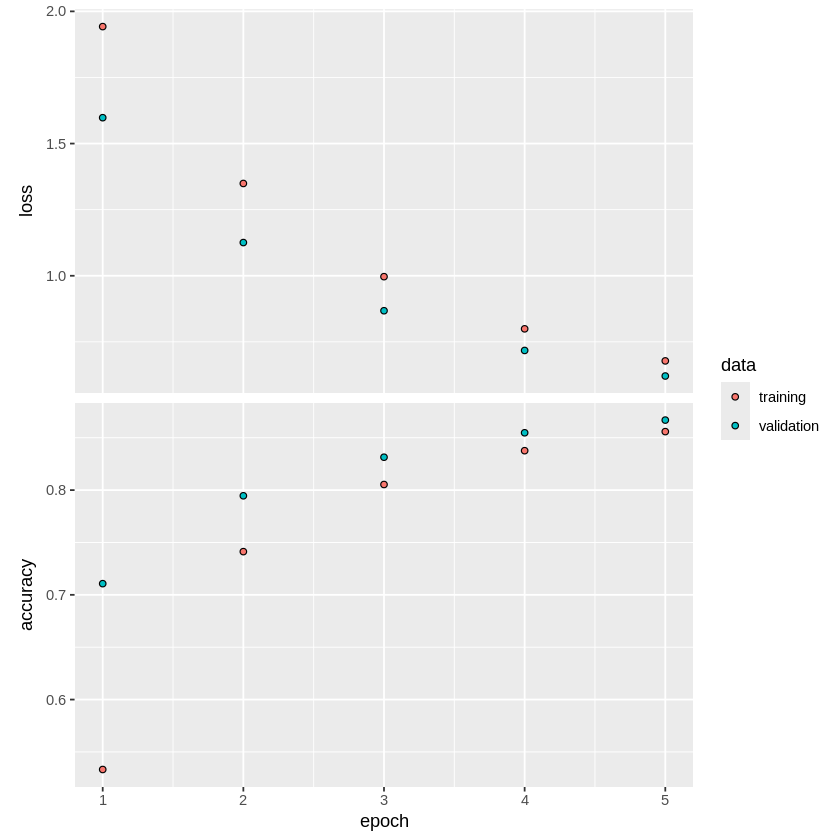

In [7]:
plot(history)